# Library

In [1]:
library(Seurat) # please update to Seurat V4
library(SeuratDisk)
library(limma)
library(ComplexHeatmap)
library(nichenetr)
library(tidyverse)
options(stringsAsFactors = FALSE)
library(patchwork)

library(glue)

options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)

library(circlize)
library(cluster)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: grid

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexH

# Part 1

### Create seurat object

In [2]:
abbrev = "AD"

seurat_object <- LoadH5Seurat("/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/AMP-AD_ROSMAP_annotated.h5seurat", 
                              meta.data = FALSE, misc = FALSE)
meta <- read.csv(file = "/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/meta_withDisorderInfo.csv",
                 sep = ',',row.names='barcodekey')
meta <- meta %>% mutate(subclass = recode(subclass, "L5 ET" = 'L5', "L5 IT" = 'L5'))
seurat_object <- AddMetaData(object = seurat_object, metadata = meta)
seurat_object

Validating h5Seurat file

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca_harmony

Adding cell embeddings for pca_harmony

Adding miscellaneous information for pca_harmony

Warning message:
“Key ‘PC_’ taken, using ‘pcaharmony_’ instead”
Adding reduction pca_harmony_knn_distances

Adding cell embeddings for pca_harmony_knn_distances

Adding miscellaneous information for pca_harmony_knn_distances

Warning message:
“Key ‘PC_’ taken, using ‘pcaharmonyknndistances_’ instead”
Adding reduction pca_harmony_knn_indices

Adding cell embeddings for pca_harmony_knn_indices

Adding miscellaneous information for pca_harmony_knn_indices

Warning message:
“Key ‘PC_’ taken, using ‘pcaharmonyknnindices_’ instead”
Adding reduction pca_regressed

Adding cell 

An object of class Seurat 
32270 features across 63942 samples within 1 assay 
Active assay: RNA (32270 features, 0 variable features)
 2 layers present: counts, data
 9 dimensional reductions calculated: pca, pca_harmony, pca_harmony_knn_distances, pca_harmony_knn_indices, pca_regressed, pca_regressed_harmony, pca_regressed_harmony_knn_distances, pca_regressed_harmony_knn_indices, umap

In [3]:
head(seurat_object@meta.data)

,X,n_genes,n_counts,Channel,anno,subclass,azimuth,sampleID,individualID,Disorder
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
D17-8753-TGCGCAGCATCGGGTC,0,10905,66946,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,cognitive impairment
D17-8753-CTCGAAACATCGACGC,1,10375,59114,D17-8753-,L5 ET,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment
D17-8753-TGCGCAGGTATCGCAT,2,10518,58903,D17-8753-,L5 ET,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment
D17-8753-GTTACAGCACATTAGC,3,10268,49493,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,cognitive impairment
D17-8753-TCCCGATCAATGTTGC,4,9969,48719,D17-8753-,L5 IT-5,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment
D17-8753-ACTGAACAGTGGCACA,5,9739,46728,D17-8753-,L6 IT-5,L6 IT,L6 IT,D17-8753,ROS13,cognitive impairment


In [4]:
unique(seurat_object@meta.data['subclass'])

,subclass
,<chr>
D17-8753-TGCGCAGCATCGGGTC,L2/3 IT
D17-8753-CTCGAAACATCGACGC,L6 IT
D17-8753-TACAGTGTCATCGGAT,L6b
D17-8753-AGGTCATCAATGGAGC,L5
D17-8753-CCTAGCTTCATCGCTC,L6 IT Car3
D17-8753-TTGTAGGGTCTCGTTC,L4 IT
D17-8753-CAGATCAAGATGCGAC,L6 CT
D17-8753-TGTGTTTAGCTCCTTC,Pvalb
D17-8753-TCAGCTCCACTCAGGC,Sst Chodl


### Load database for NicheNet

In [5]:
ligand_target_matrix = readRDS(url("https://zenodo.org/record/3260758/files/ligand_target_matrix.rds"))
lr_network = readRDS(url("https://zenodo.org/record/3260758/files/lr_network.rds"))
weighted_networks = readRDS(url("https://zenodo.org/record/3260758/files/weighted_networks.rds"))

weighted_networks_lr = weighted_networks$lr_sig %>% inner_join(lr_network %>% distinct(from,to), by = c("from","to"))

## Load Variably

In [6]:
n_ligands = 20
n_targets = 400
cutoff = 0.25
receiver = "all"   # all, INH, EXC

if (abbrev == "AD") {
    # 23 intersected risk genes
    gene_list <- c('ABCA7', 'EIF2AK2', 'APP', 'CR1', 'FERMT2', 'APOE', 'CLU', 'PICALM', 'ADAM10', 'ABCA1', 
                   'HLA-DRB1', 'CD33', 'CD2AP', 'MME', 'TREM2', 'CASS4', 'MS4A4A', 'APH1B', 'BIN1', 'ACE', 
                   'SORL1', 'GRN', 'SNX1')

    expressed_genes_receiver_path <- 'Alz_Disease/AD_expressed_genes_receiver-all.rds'
    expressed_genes_sender_path <- 'Alz_Disease/AD_expressed_genes_sender-all.rds'  
} 

### Risk Gene (Choose one to run)

In [7]:
#Matthew_SCZ
geneset_df <- gene_list
geneset_oi <- unique(unlist(geneset_df["V1"]))
geneset_oi <- geneset_oi %>% .[. %in% rownames(ligand_target_matrix)]
length(geneset_oi)

[1] 0

### Receiver and sender celltypes, and the length of expressed genes receiver...

In [8]:
expressed_genes_receiver = readRDS(expressed_genes_receiver_path)
length(expressed_genes_receiver)

[1] 12910

In [9]:
background_expressed_genes = expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
length(background_expressed_genes)

[1] 11152

In [10]:
expressed_genes_sender = readRDS(expressed_genes_sender_path)
length(expressed_genes_sender)

[1] 4594

### Subset the seurat object

In [11]:
Idents(seurat_object) <- seurat_object@meta.data["subclass"]$subclass

# Part II: Standard NicheNet analysis

In [12]:
ligands = lr_network %>% pull(from) %>% unique()
receptors = lr_network %>% pull(to) %>% unique()

expressed_ligands = intersect(ligands,expressed_genes_sender)
expressed_receptors = intersect(receptors,expressed_genes_receiver)

potential_ligands = lr_network %>% filter(from %in% expressed_ligands & to %in% expressed_receptors) %>% pull(from) %>% unique()

In [13]:
length(potential_ligands)

[1] 102

In [14]:
ligand_activities = predict_ligand_activities(geneset = geneset_oi, background_expressed_genes = background_expressed_genes, 
                                              ligand_target_matrix = ligand_target_matrix, potential_ligands = potential_ligands)

ERROR: Error in evaluate_target_prediction(setting, ligand_target_matrix, ligands_position): all genes have same response


In [15]:
ligand_activities = ligand_activities %>% arrange(-pearson) %>% mutate(rank = rank(desc(pearson)))

ERROR: Error in eval(expr, envir, enclos): object 'ligand_activities' not found


In [16]:
best_upstream_ligands = ligand_activities %>% top_n(n_ligands, pearson) %>% arrange(-pearson) %>% pull(test_ligand) %>% unique()

ERROR: Error in eval(expr, envir, enclos): object 'ligand_activities' not found


## Dotplot

In [17]:
dotplot <- DotPlot(seurat_object, features = best_upstream_ligands, cols = "RdYlBu") + RotatedAxis()

ERROR: Error in eval(expr, envir, enclos): object 'best_upstream_ligands' not found


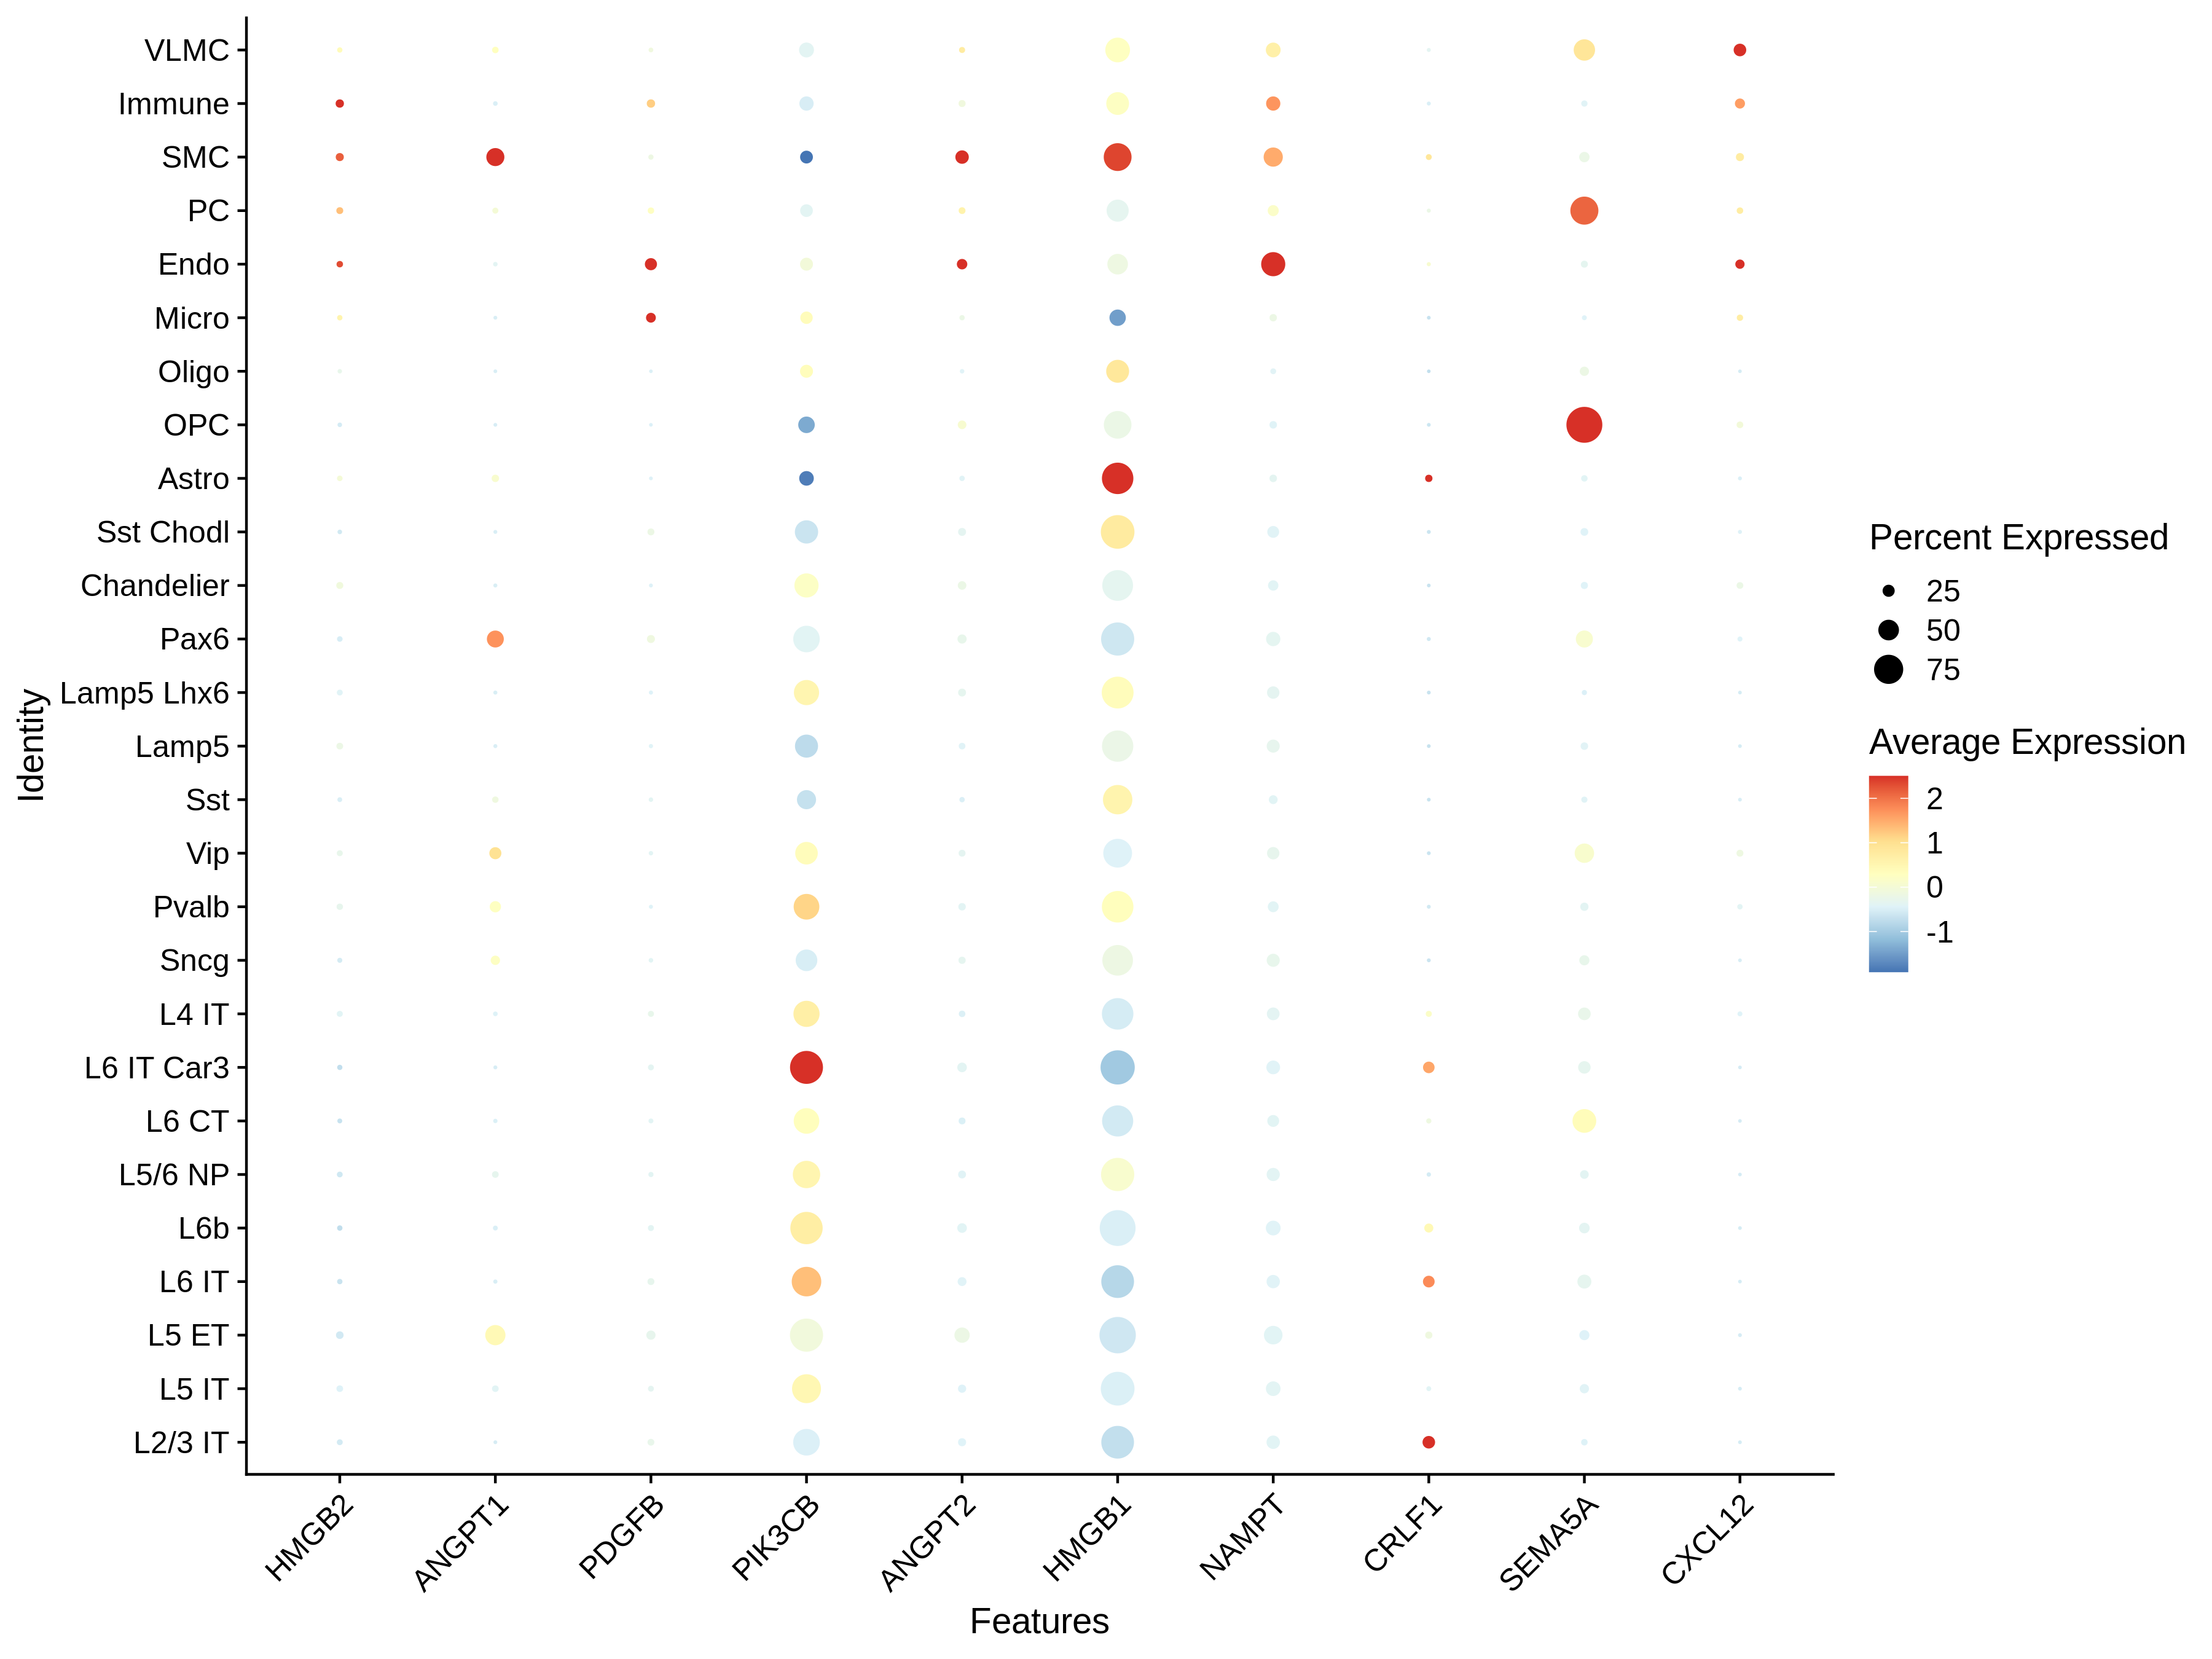

In [35]:
# pdf(file = glue("figF-nichenet_{disease}-dotplot.pdf"), width=1200, height=600) 
dotplot
# dev.off()

## lig_Target

In [15]:
active_ligand_target_links_df = best_upstream_ligands %>% lapply(get_weighted_ligand_target_links,
                                                                 geneset = geneset_oi, 
                                                                 ligand_target_matrix = ligand_target_matrix, n = n_targets) %>% bind_rows() %>% drop_na()
active_ligand_target_links = prepare_ligand_target_visualization(ligand_target_df = active_ligand_target_links_df, 
                                                                 ligand_target_matrix = ligand_target_matrix, cutoff = cutoff)
order_ligands = intersect(best_upstream_ligands, colnames(active_ligand_target_links)) %>% rev() %>% make.names()
order_targets = active_ligand_target_links_df$target %>% unique() %>% intersect(rownames(active_ligand_target_links)) %>% make.names()
rownames(active_ligand_target_links) = rownames(active_ligand_target_links) %>% make.names()
colnames(active_ligand_target_links) = colnames(active_ligand_target_links) %>% make.names()
vis_ligand_target = active_ligand_target_links[order_targets,order_ligands] %>% t()
p_ligand_target_network = vis_ligand_target %>% make_heatmap_ggplot("Prioritized ligands",
                                                                    "Predicted target genes", 
                                                                    color = "purple",
                                                                    legend_position = "top", 
                                                                    x_axis_position = "top",
                                                                    legend_title = "Regulatory potential")  + 
theme(axis.text.x = element_text(face = "italic")) + scale_fill_gradient2(low = "whitesmoke",  high = "purple", breaks = c(0,0.0045,0.0090))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [16]:
dim(vis_ligand_target)

[1] 20 45

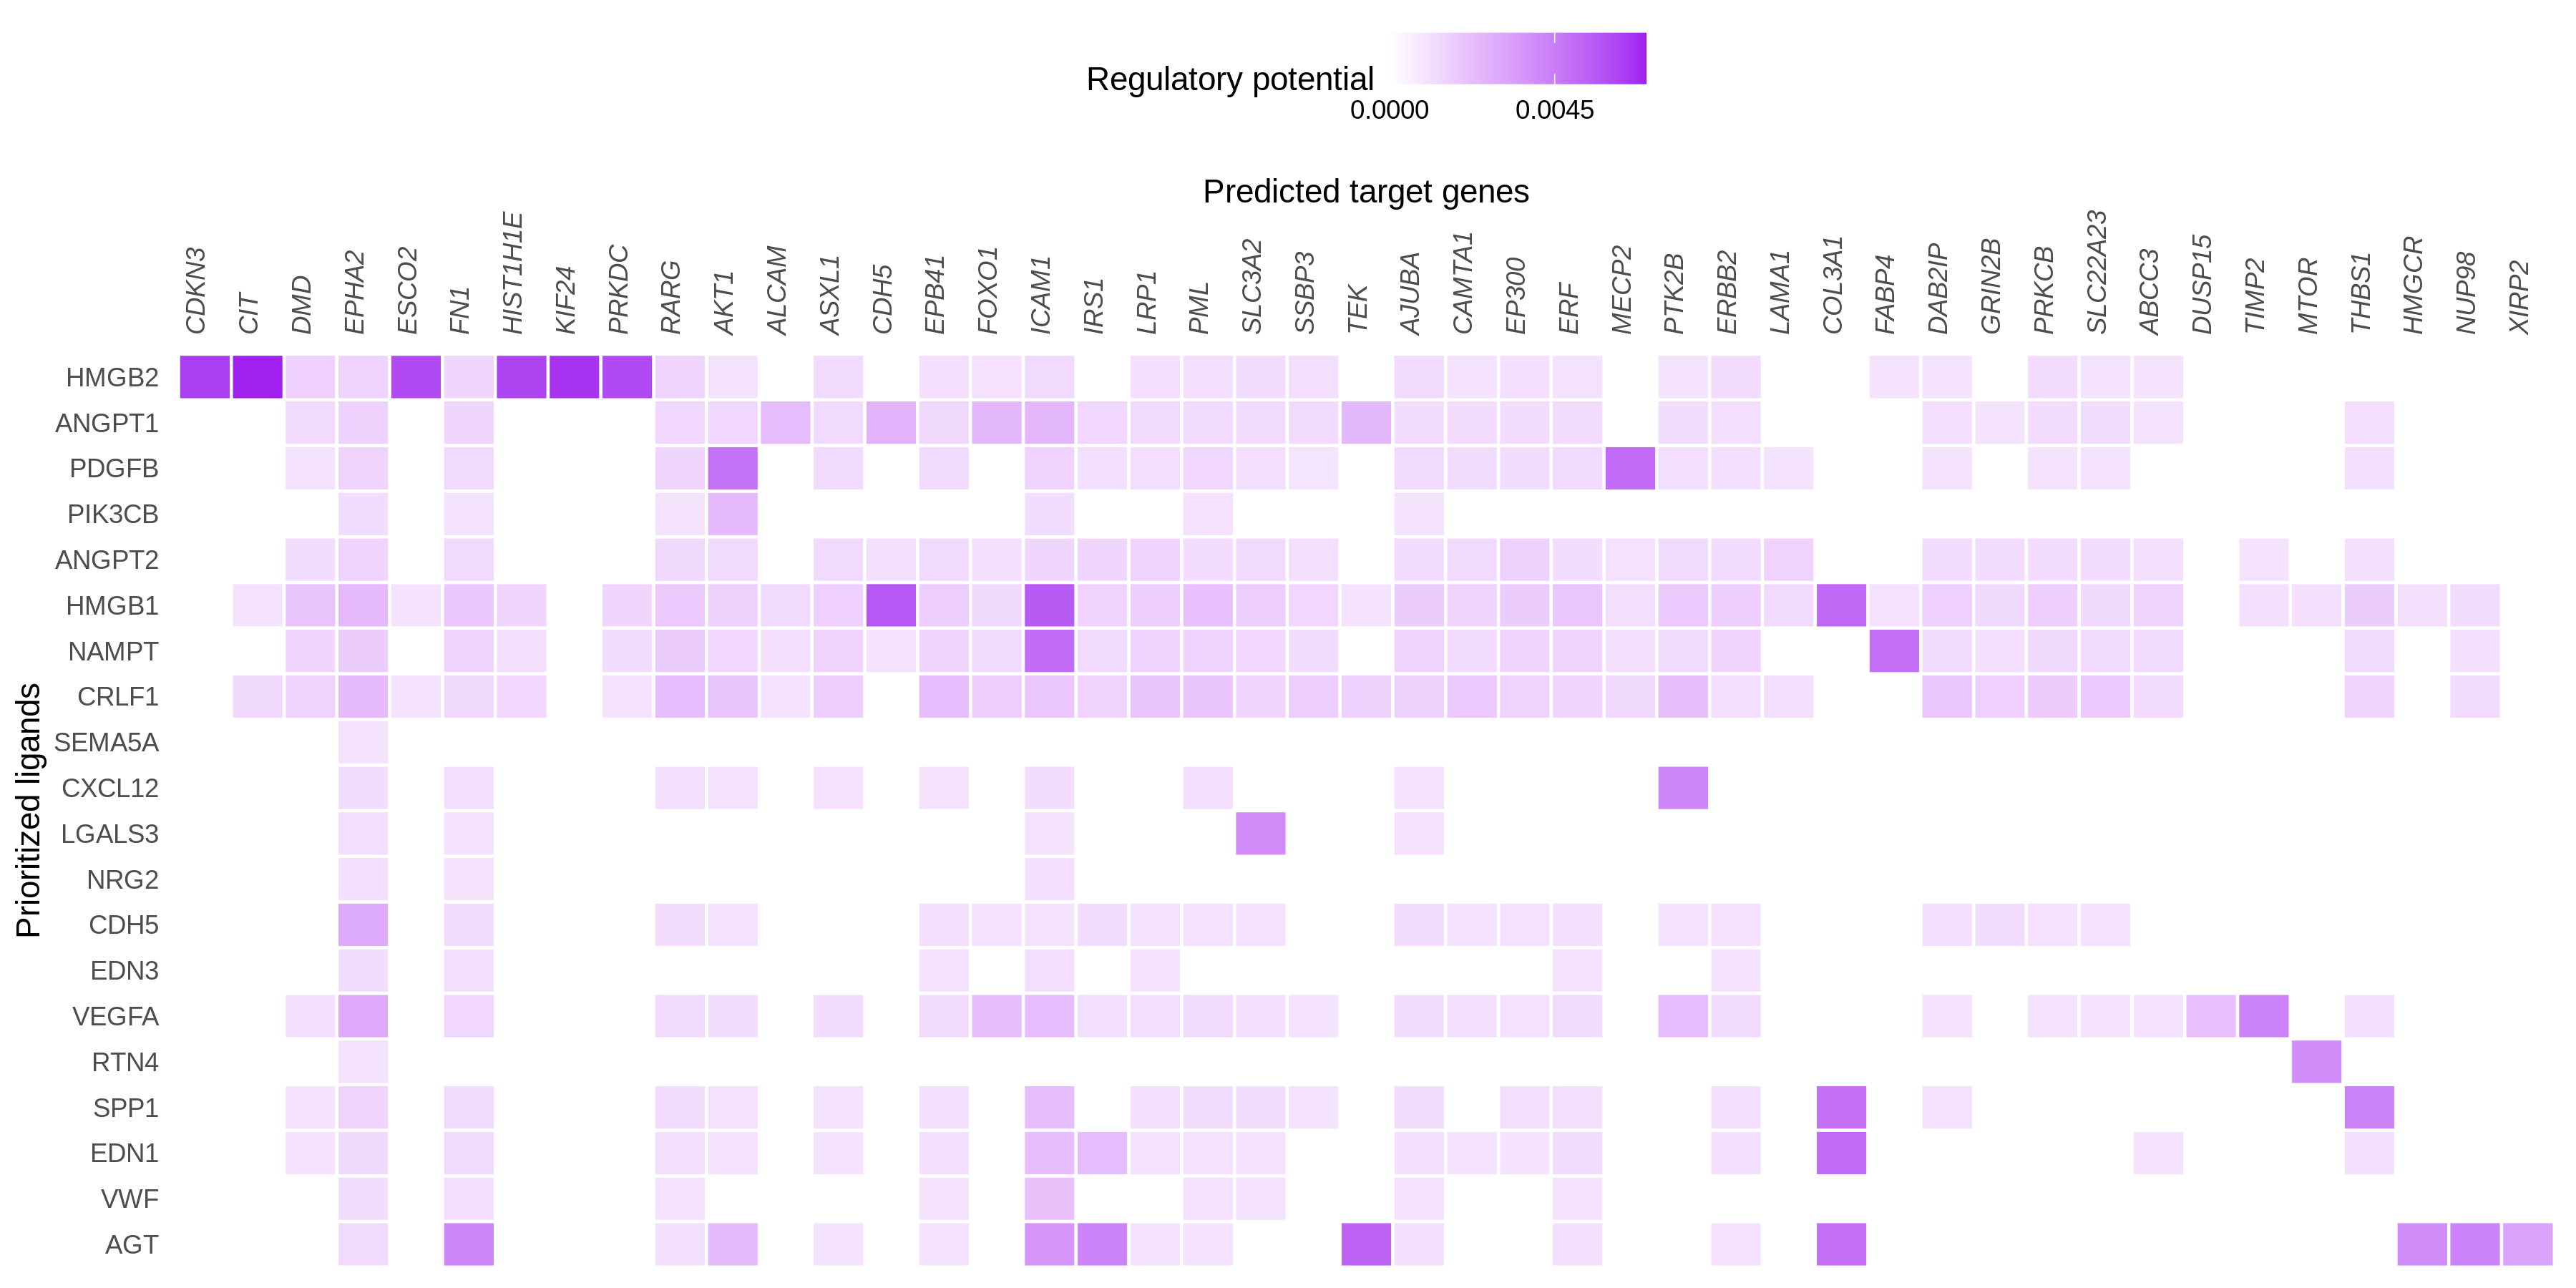

In [17]:
# pdf(file = glue("figG-nichenet-{abbrev}_full.pdf"), width = 12, height = 9) 
p_ligand_target_network
# dev.off()

In [18]:
saveRDS(object = vis_ligand_target, file = glue("{abbrev}-vis_ligand_target.rds"))

### My

In [85]:
abbrev = 'BD'

In [86]:
vis_ligand_target = readRDS(file = glue("{abbrev}-vis_ligand_target.rds"))

In [87]:
same_vis_ligand_target = tail(vis_ligand_target, n = 10)[, names(sort(colSums(vis_ligand_target), decreasing = TRUE))[1:30]]
same_vis_ligand_target

,NAV2,FOXP1,ELMO1,CMIP,ABLIM1,ANK3,NRXN3,SGMS1,CAMTA1,ATXN1,⋯,FRMD6,ADD3,KCNMA1,PLCG2,FBN2,POU2F1,ARHGEF3,SATB2,GLI3,ANKFN1
NCAM1,0.0012021600,0.001069785,0.0011014710,0.0012236841,0.0010140289,0.0010564270,0.0009626541,0.0009885266,0.0009118534,0.0009931300,⋯,0.001032206,0.0009879111,0.0000000000,0.0010178545,0.0000000000,0.001004375,0.0000000000,0.0000000000,0.0000000000,0.000000000
INHBA,0.0015970763,0.001686462,0.0015748091,0.0016349693,0.0014199806,0.0014709517,0.0014492001,0.0014194885,0.0012219764,0.0014148536,⋯,0.001241666,0.0010120684,0.0013042464,0.0010617900,0.0012514070,0.001246671,0.0013358087,0.0010017324,0.0013765667,0.001286993
YARS,0.0011007533,0.001095346,0.0010597156,0.0011501251,0.0010443467,0.0009737623,0.0000000000,0.0009225314,0.0000000000,0.0009207981,⋯,0.000000000,0.0009108656,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.0009409222,0.0000000000,0.000000000
EBI3,0.0032450159,0.003312504,0.0040905458,0.0021260267,0.0027130491,0.0032940679,0.0032442587,0.0029960549,0.0031916733,0.0018161013,⋯,0.002993303,0.0024854999,0.0015663254,0.0016812645,0.0026664700,0.002206894,0.0019729000,0.0016918214,0.0020548818,0.001863153
SEMA3B,0.0009735863,0.001104674,0.0009245845,0.0009648781,0.0000000000,0.0009811116,0.0009054340,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
COL5A3,0.0011568533,0.001146380,0.0010020810,0.0011677458,0.0010500510,0.0009136146,0.0009306954,0.0009489221,0.0000000000,0.0010496667,⋯,0.000000000,0.0000000000,0.0009054918,0.0000000000,0.0000000000,0.000000000,0.0009202592,0.0000000000,0.0009822758,0.000968308
LAMB2,0.0013224184,0.001081645,0.0011120801,0.0011572222,0.0011777090,0.0009308486,0.0010656903,0.0009616724,0.0010754052,0.0009547543,⋯,0.000000000,0.0000000000,0.0000000000,0.0009190599,0.0009234748,0.000000000,0.0000000000,0.0008985284,0.0000000000,0.000000000
PTPRT,0.0023308907,0.001708630,0.0018419705,0.0015997235,0.0018669111,0.0012304575,0.0015066703,0.0014464751,0.0017947333,0.0011357764,⋯,0.001128742,0.0000000000,0.0013218466,0.0012902195,0.0016388781,0.001209524,0.0010450953,0.0013880275,0.0010593545,0.001415436
OCLN,0.0011756649,0.001147220,0.0009605806,0.0011039817,0.0009991296,0.0009515830,0.0009469783,0.0000000000,0.0009163723,0.0009500411,⋯,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0009078695,0.0000000000,0.0009268249,0.000000000
GPNMB,0.0018140574,0.001558459,0.0015512718,0.0014474125,0.0015896227,0.0016281167,0.0013004636,0.0016268675,0.0014043816,0.0015305961,⋯,0.001158067,0.0013764430,0.0014612923,0.0012448009,0.0017099921,0.001468733,0.0016759113,0.0012057409,0.0013872052,0.001408298


In [88]:
top15 = names(sort(apply(same_vis_ligand_target,2,max), decreasing = T)[1:15])
top15

[1] "ELMO1"  "FOXP1"  "ANK3"   "SHANK2" "NAV2"   "NRXN3"  "CAMTA1" "SGMS1" 
 [9] "FRMD6"  "PALLD"  "ABLIM1" "FBN2"   "NCAM1"  "ADD3"   "MEF2C"

In [89]:
same_vis_ligand_target = same_vis_ligand_target[,top15]

In [90]:
pdf(file = glue("figF-nichenet-{abbrev}.pdf"), width = 20, height = 9)
ht1 <- Heatmap(same_vis_ligand_target, 
               name = "Regulatory Potential", #title of legend
               column_title = glue("Receiver Risk Genes of {abbrev} (in Neurons)"), row_title = "Sender Ligand Genes\n(in Non-Neuronal Cells)", 
               column_title_gp = gpar(fontsize = 40, fontface = "bold"),                                      # Column Title Font
               row_title_gp = gpar(fontsize = 30),                                                            # Row Title Font
               show_row_dend = FALSE, show_column_dend = FALSE,                                               # No dendrograms
               rect_gp = gpar(col = "white", lwd = 2),                                                        # ea cell has a white border
               col = colorRamp2(c(min(vis_ligand_target), max(vis_ligand_target)), c("white", "purple")),     # Set Color
               width = ncol(vis_ligand_target)*unit(5, "mm"), height = nrow(vis_ligand_target)*unit(8, "mm"), # set cell height and width
               row_names_side = 'left', column_names_side = 'top',                                            # Row and column names on the right side
               row_names_gp = gpar(fontsize = 20), column_names_gp = gpar(fontsize = 20),
               cluster_rows = diana, cluster_columns = diana,                                                 # clustering
               heatmap_legend_param = list(legend_direction = "horizontal", legend_width = unit(5, "cm"))
               )
draw(ht1, heatmap_legend_side = "bottom")
dev.off()

png 
  2

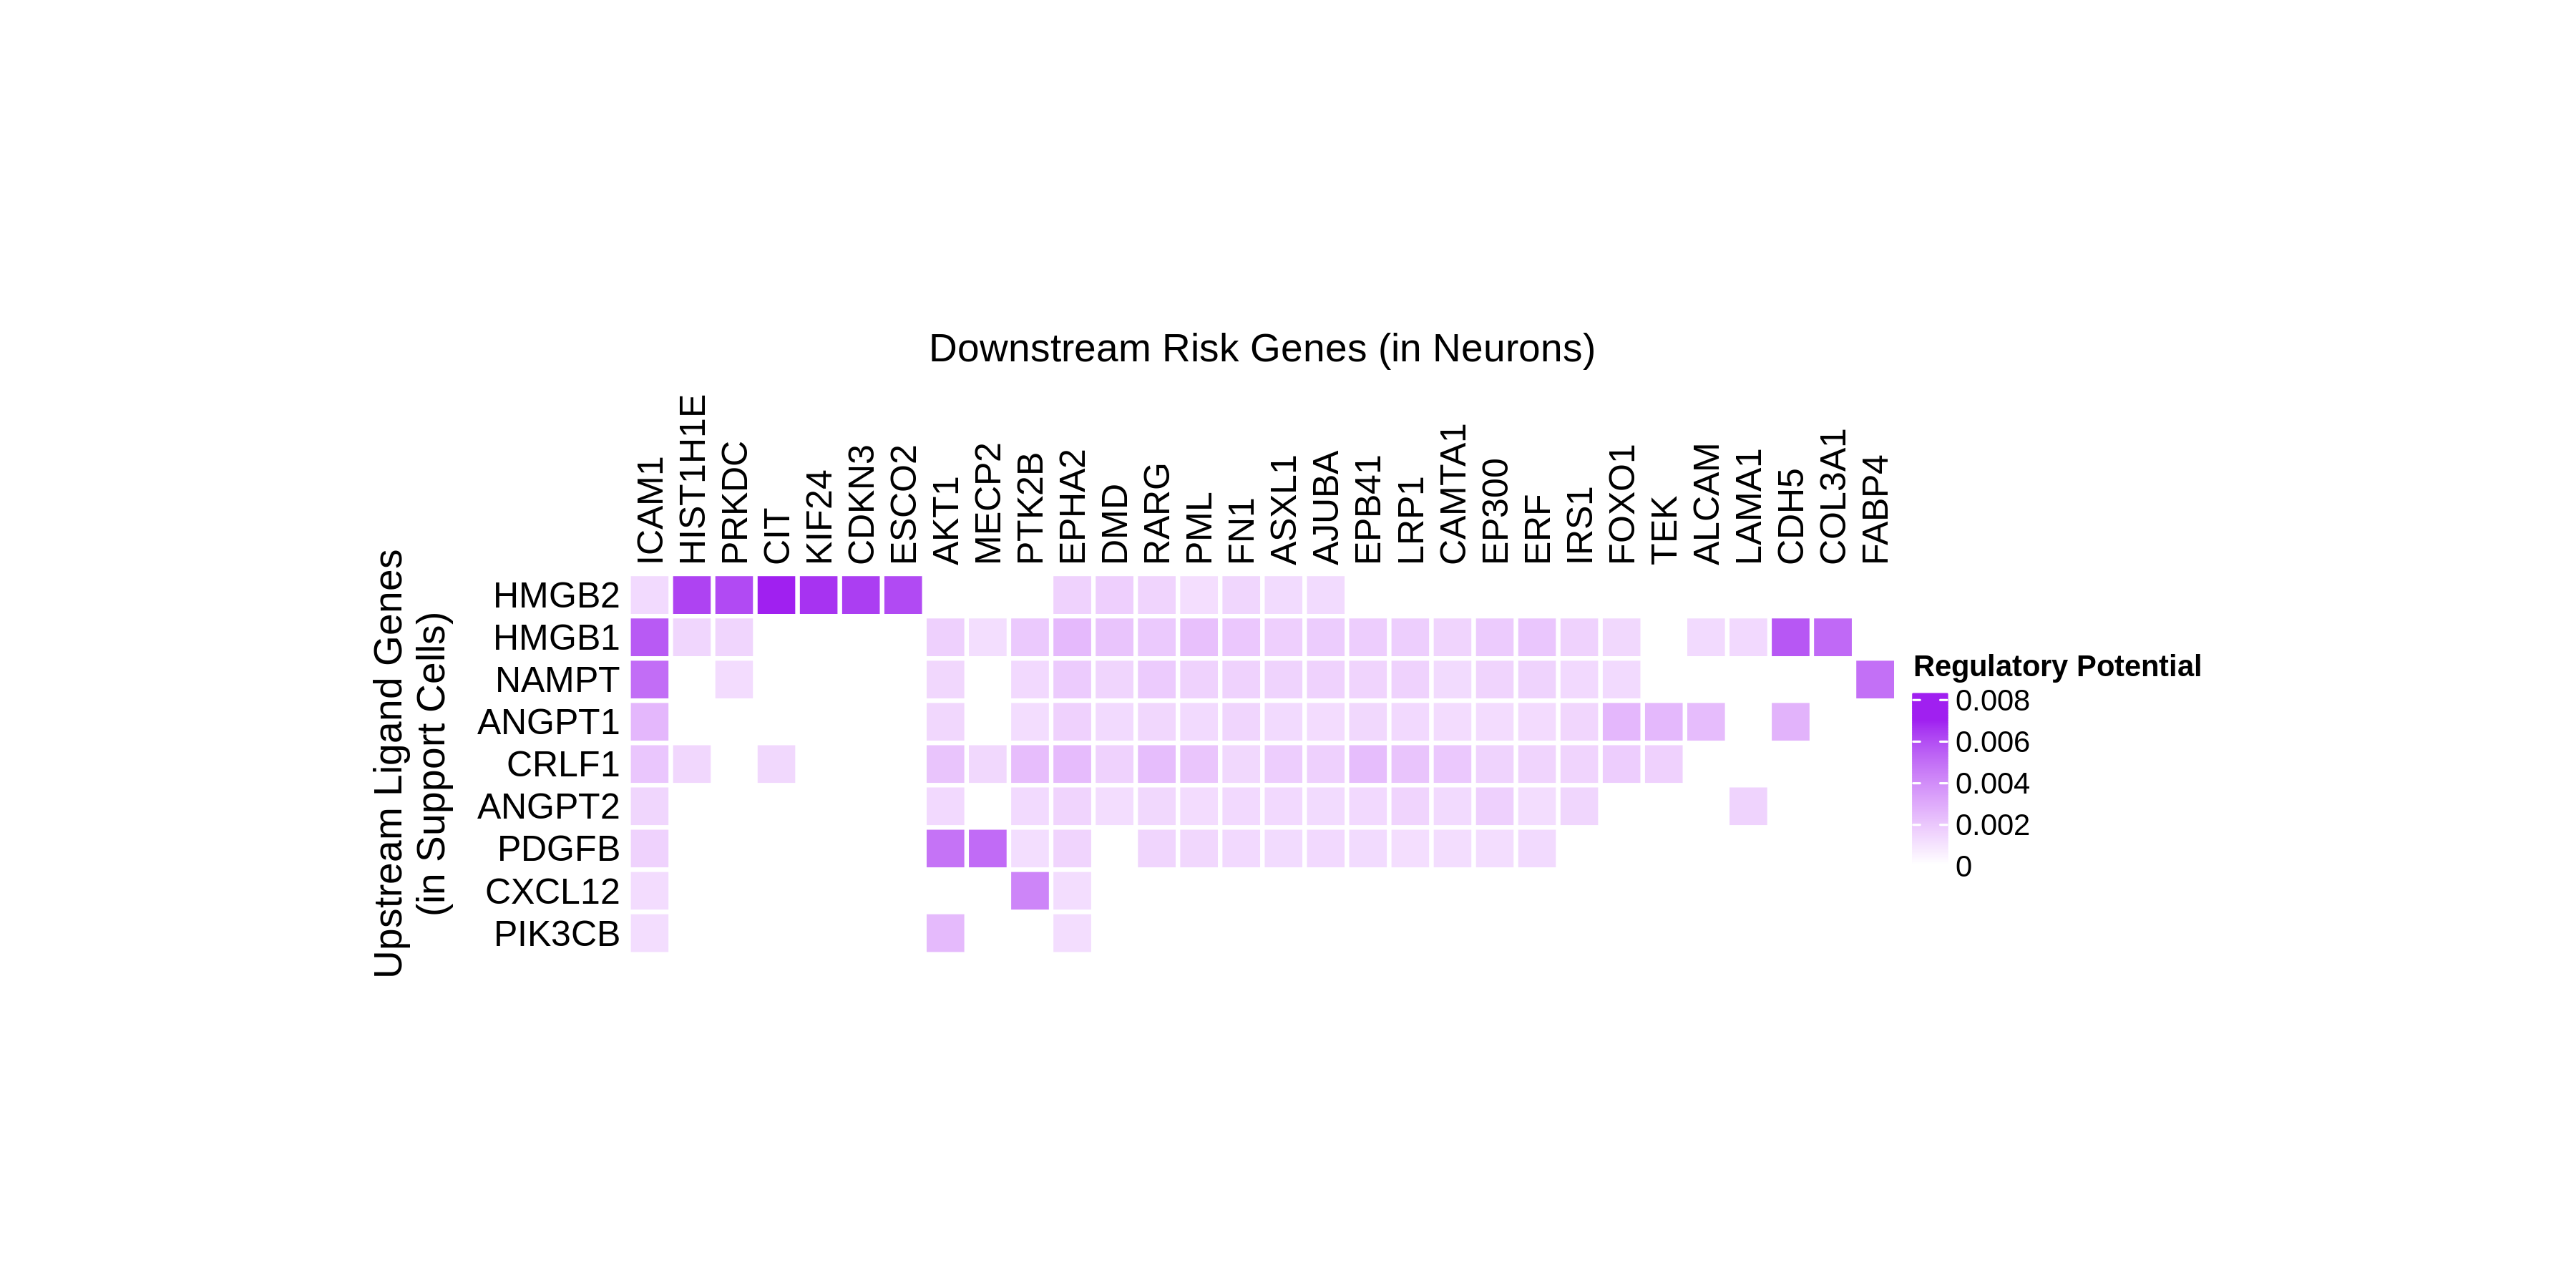

In [124]:
# Heatmap(vis_ligand_target, 
#         name = "Regulatory Potential", #title of legend
#         column_title = "Downstream Risk Genes (in Neurons)", row_title = "Upstream Ligand Genes\n(in Support Cells)",
#         show_row_dend = FALSE, show_column_dend = FALSE, # No dendrograms
#         rect_gp = gpar(col = "white", lwd = 2), # ea cell has a white border
#         col = col_fun, 
#         width = ncol(vis_ligand_target)*unit(5, "mm"), height = nrow(vis_ligand_target)*unit(5, "mm"), # set cell height and width
#         row_names_side = 'left', column_names_side = 'top', # have the row and column names on the right side
#         cluster_columns = diana
#         )

## lig_Receptor

In [38]:
lr_network_top = lr_network %>% filter(from %in% best_upstream_ligands & to %in% expressed_receptors) %>% distinct(from,to)
best_upstream_receptors = lr_network_top %>% pull(to) %>% unique()

lr_network_top_df_large = weighted_networks_lr %>% filter(from %in% best_upstream_ligands & to %in% best_upstream_receptors)

lr_network_top_df = lr_network_top_df_large %>% spread("from","weight",fill = 0)
lr_network_top_matrix = lr_network_top_df %>% select(-to) %>% as.matrix() %>% magrittr::set_rownames(lr_network_top_df$to)

dist_receptors = dist(lr_network_top_matrix, method = "binary")
hclust_receptors = hclust(dist_receptors, method = "ward.D2")
order_receptors = hclust_receptors$labels[hclust_receptors$order]
    
dist_ligands = dist(lr_network_top_matrix %>% t(), method = "binary")
hclust_ligands = hclust(dist_ligands, method = "ward.D2")
order_ligands_receptor = hclust_ligands$labels[hclust_ligands$order]

order_receptors = order_receptors %>% intersect(rownames(lr_network_top_matrix))
order_ligands_receptor = order_ligands_receptor %>% intersect(colnames(lr_network_top_matrix))

vis_ligand_receptor_network = lr_network_top_matrix[order_receptors, order_ligands_receptor]
rownames(vis_ligand_receptor_network) = order_receptors %>% make.names()
colnames(vis_ligand_receptor_network) = order_ligands_receptor %>% make.names()

In [39]:
p_ligand_receptor_network = vis_ligand_receptor_network %>% t() %>% make_heatmap_ggplot("Ligands","Receptors", color = "mediumvioletred", 
                                                                                        x_axis_position = "top",
                                                                                        legend_title = "Prior interaction potential")

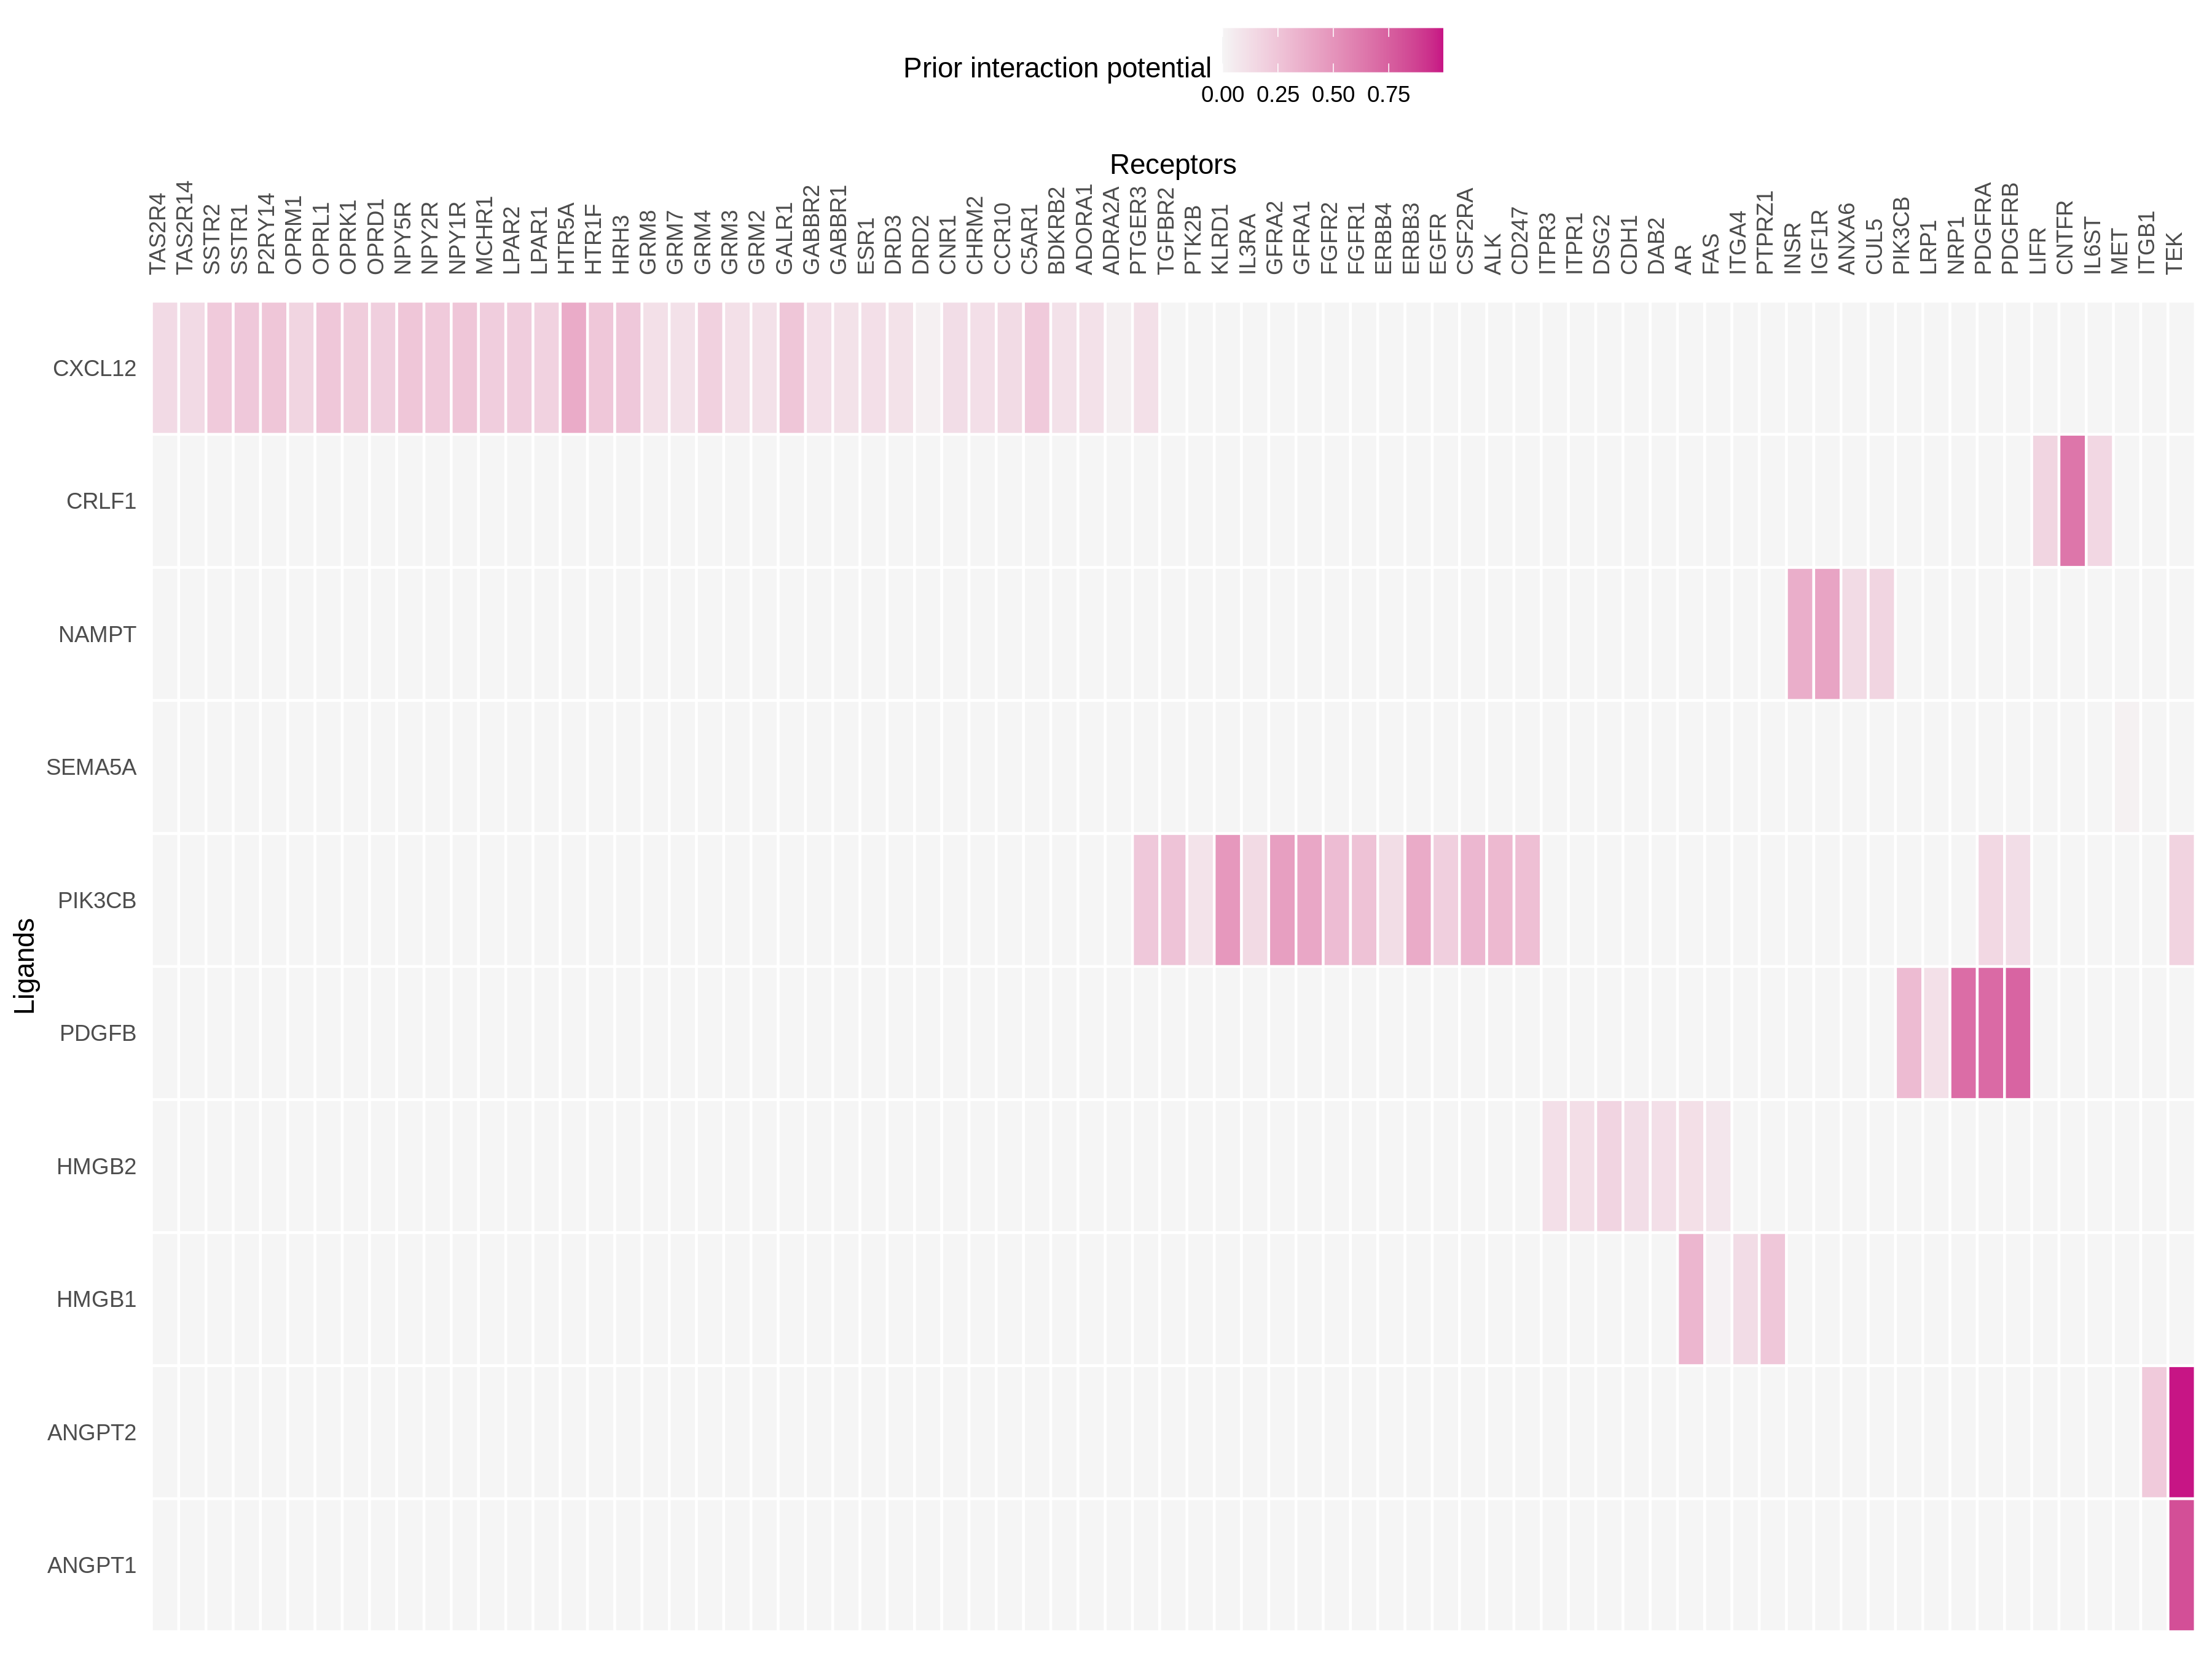

In [40]:
# pdf(file = glue("figF-nichenet_{disease}-lig_receptor.pdf"), width=1600, height=600) 
p_ligand_receptor_network
# dev.off()

### Check DEG Direction

In [ ]:
scz_markers <- readRDS("/srv/disk00/yifengx4/SZBD_scz_markers_logfc0.rds")

In [ ]:
bd_s <- rownames(bd_markers)
names(bd_s) <- bd_s

In [ ]:
# we can just search the genes we are interested in
bd_markers[bd_s[startsWith(bd_s, 'WNT')],]